In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\14 Decision Tree\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.skew()

C:\Users\prajw\AppData\Local\Temp\ipykernel_18460\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [8]:
df.kurt()

C:\Users\prajw\AppData\Local\Temp\ipykernel_18460\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [9]:
df1=pd.get_dummies(df,columns=["ShelveLoc","Urban","US"])

In [10]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [11]:
#sns.pairplot(df1)

In [12]:
corr=df1.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


<AxesSubplot:>

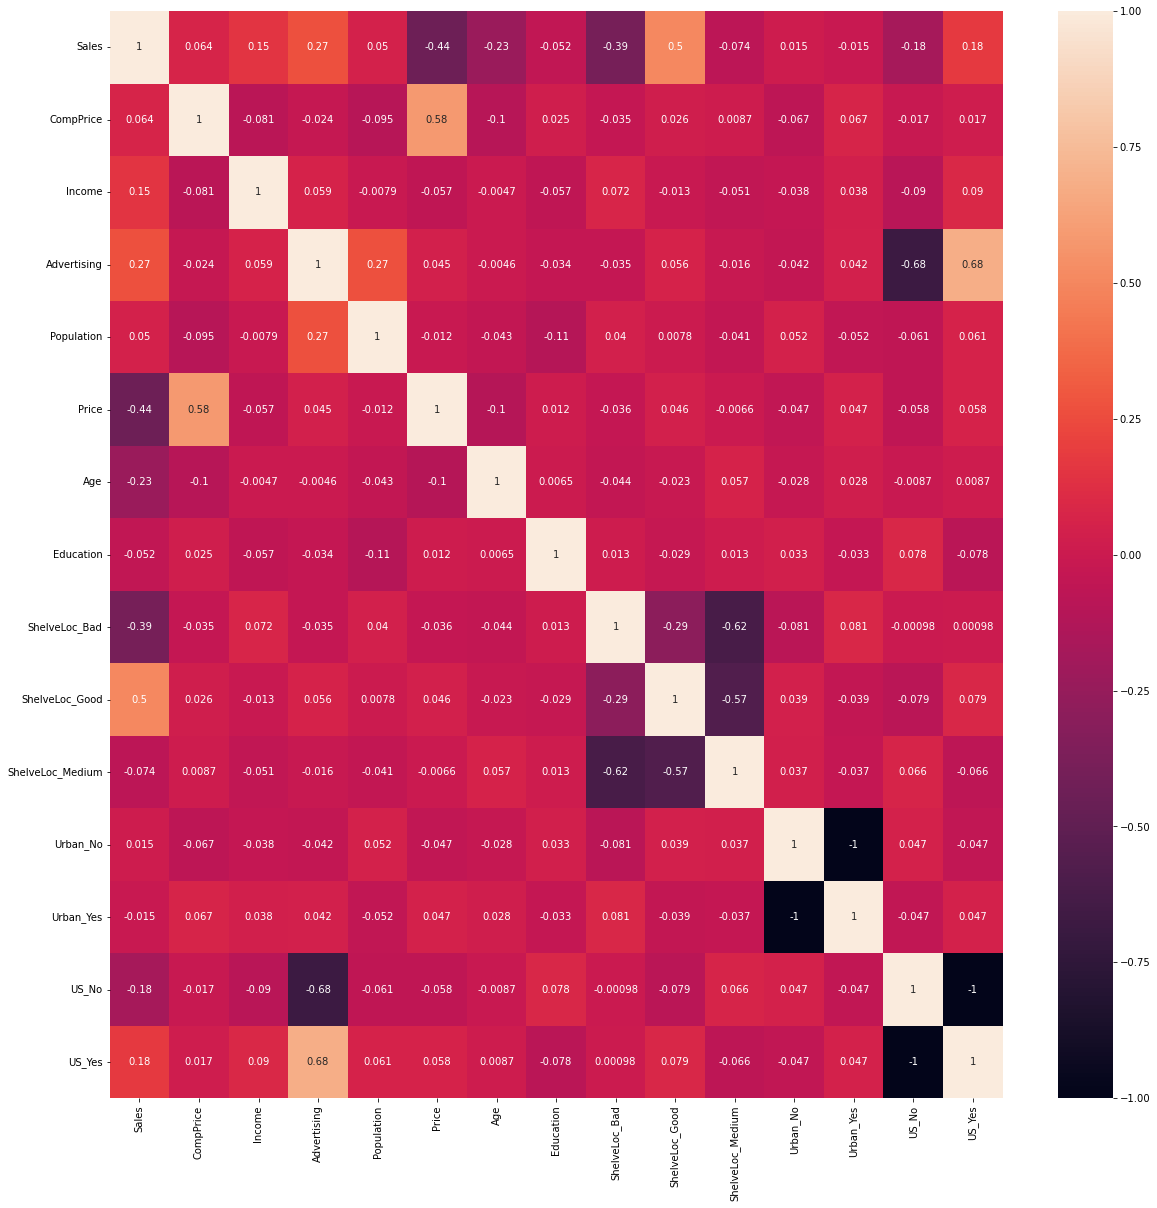

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [14]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [16]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small


In [17]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales'],
      dtype='object')

In [23]:
pd.DataFrame({"Columns":df1.columns})

,Columns
0,CompPrice
1,Income
2,Advertising
3,Population
4,Price
5,Age
6,Education
7,ShelveLoc_Bad
8,ShelveLoc_Good
9,ShelveLoc_Medium


In [28]:
x=df1.iloc[:,0:14]
y=df1.iloc[:,14]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc=DecisionTreeClassifier(criterion="entropy")

In [44]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
pred_train=dtc.predict(x_train)

In [46]:
pred_test=dtc.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
accuracy_score(y_train,pred_train)

1.0

In [49]:
accuracy_score(y_test,pred_test)

0.7

In [50]:
confusion_matrix(y_test,pred_test)

array([[32, 11],
       [13, 24]], dtype=int64)